## Problem Statement
The goal of a credit organization is to determine who will continue to pay off their debt slavery. Our object, therefore, is to identify the people who will not default on their payments. We would like to do this with about 95% accuracy, although the credit card companies have themselves identified patterns that can predict whether someone is about to get divorced, which is pretty cynical.

# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest

%matplotlib inline

In [2]:
df = pd.read_csv('CreditDefault.csv', index_col = 'ID')

In [3]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2.0,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2.0,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2.0,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2.0,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2.0,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# clean up some of the names
df.rename(columns={'default payment next month':'default'}, inplace=True)

In [5]:
# What are we working with?
df.dtypes

LIMIT_BAL                       int64
SEX                             int64
EDUCATION                     float64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                       int64
BILL_AMT2                     float64
BILL_AMT3                       int64
BILL_AMT4                       int64
BILL_AMT5                       int64
BILL_AMT6                       int64
PAY_AMT1                        int64
PAY_AMT2                        int64
PAY_AMT3                        int64
PAY_AMT4                        int64
PAY_AMT5                        int64
PAY_AMT6                        int64
default payment next month      int64
dtype: object

In [12]:
# Any nulls? Of course there are.
df.isnull().sum()

LIMIT_BAL                        0
SEX                              0
EDUCATION                     3036
MARRIAGE                         0
AGE                              0
PAY_0                            0
PAY_2                            0
PAY_3                            0
PAY_4                            0
PAY_5                            0
PAY_6                            0
BILL_AMT1                        0
BILL_AMT2                     2543
BILL_AMT3                        0
BILL_AMT4                        0
BILL_AMT5                        0
BILL_AMT6                        0
PAY_AMT1                         0
PAY_AMT2                         0
PAY_AMT3                         0
PAY_AMT4                         0
PAY_AMT5                         0
PAY_AMT6                         0
default payment next month       0
dtype: int64

In [10]:
df.isnull().sum()/len(df)

LIMIT_BAL                     0.000000
SEX                           0.000000
EDUCATION                     0.101200
MARRIAGE                      0.000000
AGE                           0.000000
PAY_0                         0.000000
PAY_2                         0.000000
PAY_3                         0.000000
PAY_4                         0.000000
PAY_5                         0.000000
PAY_6                         0.000000
BILL_AMT1                     0.000000
BILL_AMT2                     0.084767
BILL_AMT3                     0.000000
BILL_AMT4                     0.000000
BILL_AMT5                     0.000000
BILL_AMT6                     0.000000
PAY_AMT1                      0.000000
PAY_AMT2                      0.000000
PAY_AMT3                      0.000000
PAY_AMT4                      0.000000
PAY_AMT5                      0.000000
PAY_AMT6                      0.000000
default payment next month    0.000000
dtype: float64

In [9]:
float(df.duplicated().sum()/len(df))

0.0

In [ ]:
# 64 duplicated rows, not even worth worrying about

In [5]:
# Mapping gender into the true binary because it's customary and I enjoy doing things that are customary
df['SEX'] = df.SEX.map({2:0, 1:1})

In [37]:
df.EDUCATION.describe()
#df.EDUCATION.median()

count    26964.000000
mean         1.870568
std          0.784977
min          0.000000
25%               NaN
50%               NaN
75%               NaN
max          6.000000
Name: EDUCATION, dtype: float64

In [14]:
df.EDUCATION.value_counts()

2.0    12939
1.0     9110
3.0     4500
5.0      256
4.0      103
6.0       43
0.0       13
Name: EDUCATION, dtype: int64

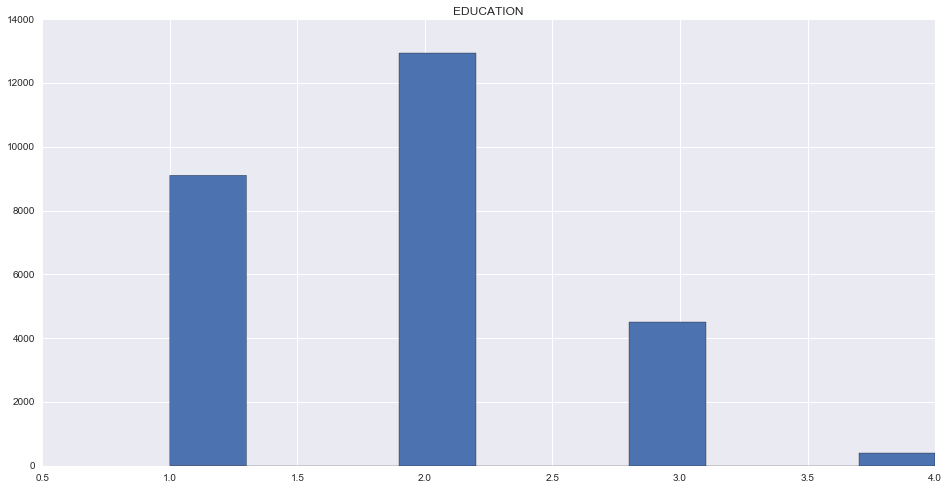

In [10]:
df.hist('EDUCATION', figsize=(16,8))
plt.show()

In [8]:
df['EDUCATION'] = df.EDUCATION.map({1.0:1.0, 2.0:2.0, 3.0:3.0, 4.0:4.0, 5.0:4.0, 6.0:4.0})

In [9]:
df.EDUCATION.value_counts(dropna=False)/len(df.EDUCATION)

 2.0    0.431300
 1.0    0.303667
 3.0    0.150000
NaN     0.101633
 4.0    0.013400
Name: EDUCATION, dtype: float64

In [11]:
# Mean and median for education are within a standard deviation of each other so replacing the nulls with 2 suffices
# This gives more weight than the population to college degrees, but it's already overweight with grad degrees
df.EDUCATION.fillna(2, inplace=True)

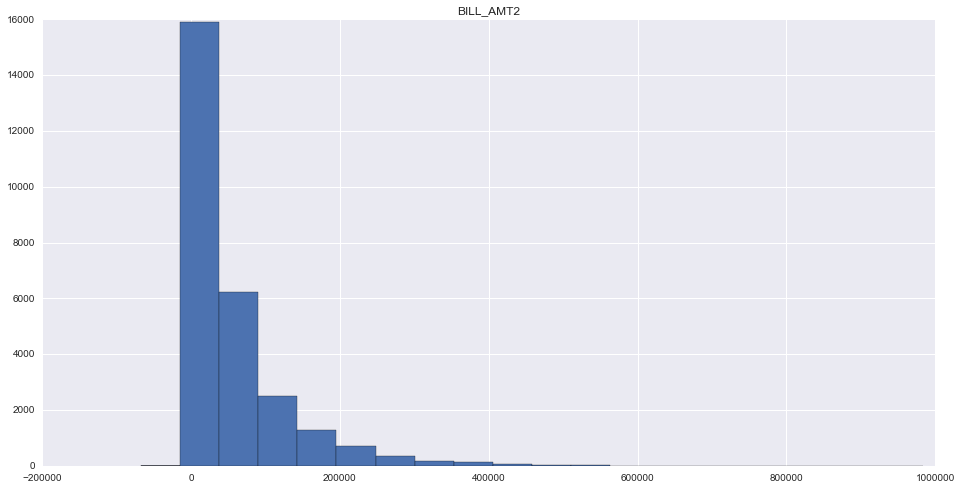

In [12]:
# BILL_AMT2 is the other outstanding null value. Should deal with that.
df.hist('BILL_AMT2', figsize=(16,8), bins=20)
plt.show()

In [13]:
# Given more time, KNN should be used to impute the bill amount value.
# But the values are all over the map, skewed by people with some ridiculously high credit limits.
# I'm comfortable imputing zero to them, though I doubt it's statistically sound, I have a deadline to meet.
df.BILL_AMT2.fillna(0, inplace=True)

In [14]:
# I wonder how, over all, people who keep a low bill-to-limit ratio do, or whether the payment-to-billing ratio might
# tell us anything.

df['BILL-LIMIT'] = (df.BILL_AMT1 + df.BILL_AMT2 + df.BILL_AMT3 + df.BILL_AMT4 + df.BILL_AMT5 + df.BILL_AMT6)/df.LIMIT_BAL
df['PAY-BILL'] = (df.PAY_AMT1 + df.PAY_AMT2 + df.PAY_AMT3 + df.PAY_AMT4 + df.PAY_AMT5 + df.PAY_AMT6)/(df.BILL_AMT1 + df.BILL_AMT2 + df.BILL_AMT3 + df.BILL_AMT4 + df.BILL_AMT5 + df.BILL_AMT6)

In [15]:
# Within my newly created ratios are some null values, again, not really worth worrying about. They likely
# result from dividing by a zero bill amount, so they, too, shall be 0.
df['PAY-BILL'].fillna(0, inplace=True)

In [39]:
df.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL-LIMIT,PAY-BILL
LIMIT_BAL,1.000000,-0.024755,-0.215134,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520,-0.382973,0.018859
SEX,-0.024755,1.000000,-0.018652,0.031389,0.090874,0.057643,0.070771,0.066096,0.060173,0.055064,...,0.016733,0.000242,0.001391,0.008597,0.002229,0.001667,0.002766,0.039961,0.068749,-0.003531
EDUCATION,-0.215134,-0.018652,1.000000,-0.147217,0.180098,0.108070,0.088114,0.071748,0.063063,0.057454,...,-0.039991,-0.055082,-0.046555,-0.055032,-0.051577,-0.053928,-0.053243,0.042386,0.138463,-0.005679
MARRIAGE,-0.108139,0.031389,-0.147217,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339,0.052065,0.003561
AGE,0.144713,0.090874,0.180098,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890,-0.041614,0.006078
PAY_0,-0.271214,0.057643,0.108070,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794,0.413147,-0.005092
PAY_2,-0.296382,0.070771,0.088114,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551,0.497415,-0.002624
PAY_3,-0.286123,0.066096,0.071748,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253,0.486304,-0.001648
PAY_4,-0.267460,0.060173,0.063063,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614,0.486614,0.002697
PAY_5,-0.249411,0.055064,0.057454,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149,0.487097,-0.001588


In [41]:
df['total_bill'] = df.BILL_AMT1 + df.BILL_AMT2 + df.BILL_AMT3 + df.BILL_AMT4 + df.BILL_AMT5 + df.BILL_AMT6

In [46]:
df['total_pmt'] = df.PAY_AMT1 + df.PAY_AMT2 + df.PAY_AMT3 + df.PAY_AMT4 + df.PAY_AMT5 + df.PAY_AMT6

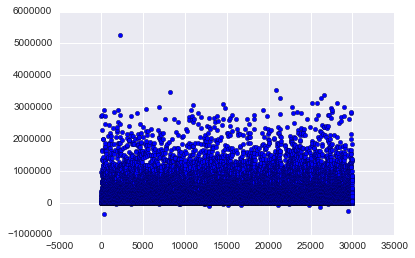

In [42]:
plt.scatter(x=df.index, y=df.total_bill)

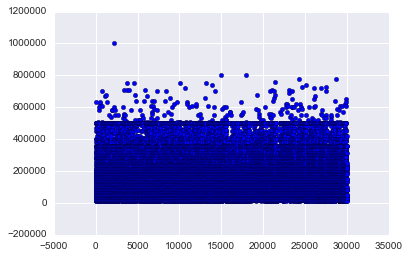

In [43]:
plt.scatter(x=df.index, y=df.LIMIT_BAL)

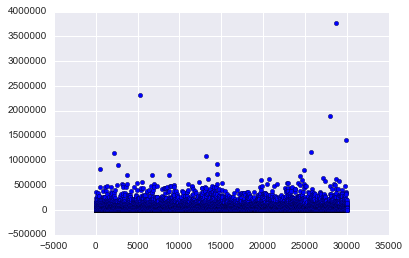

In [48]:
plt.scatter(x=df.index, y=df.total_pmt)

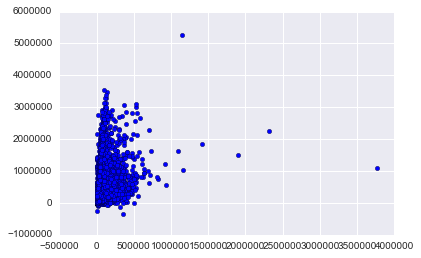

In [49]:
plt.scatter(x=df.total_pmt, y=df.total_bill)

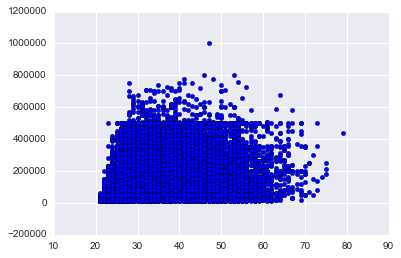

In [45]:
plt.scatter(x=df.AGE, y=df.LIMIT_BAL)

In [57]:
corrs = df.corr()
corrs.default.sort_values(ascending=False)
#remembering that 1 means the borrower defaulted

default       1.000000
PAY_0         0.324794
PAY_2         0.263551
PAY_3         0.235253
PAY_4         0.216614
PAY_5         0.204149
PAY_6         0.186866
BILL-LIMIT    0.115605
EDUCATION     0.042386
SEX           0.039961
AGE           0.013890
BILL_AMT6    -0.005372
BILL_AMT5    -0.006760
PAY-BILL     -0.007904
BILL_AMT4    -0.010156
total_bill   -0.012526
BILL_AMT2    -0.013312
BILL_AMT3    -0.014076
BILL_AMT1    -0.019644
MARRIAGE     -0.024339
PAY_AMT6     -0.053183
PAY_AMT5     -0.055124
PAY_AMT3     -0.056250
PAY_AMT4     -0.056827
PAY_AMT2     -0.058579
PAY_AMT1     -0.072929
total_pmt    -0.102354
LIMIT_BAL    -0.153520
Name: default, dtype: float64

# PREPROCESSING

In [16]:
# import StackOverflow
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

In [18]:
target = df.default
features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL-LIMIT']
X = df[features]
y = target

len(X)

30000

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20)

In [20]:
Xt_scale = preprocessing.scale(X_train)

## Modeling
Since we are looking at a binary choice here - default or not - it makes the most sense to use a logistic regression.

In [21]:
model = LogisticRegression()

In [22]:
# Fit the model to the training data
model.fit(Xt_scale, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
model.score(X_test, y_test)

0.80266666666666664

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
y_pred = model.predict(X_test)

In [26]:
cm = confusion_matrix(y_test, y_pred)
cm
# So 4,500 true positives that don't default, and 227 true negatives

array([[4593,   76],
       [1108,  223]])

In [27]:
# Gridsearch

from sklearn.grid_search import GridSearchCV

Cs = np.logspace(0.0, 5.0, 20)


search_parameters = {
    "penalty":             ['l1','l2'],   
    "C":                   Cs,  
    "dual":                [False], 
    "fit_intercept":       [False, True], 
    "class_weight":        [None, "balanced"],
    "intercept_scaling":   [2, 1],        
    "solver":              ['liblinear'],
    "warm_start":          [True, False]
}

grid = GridSearchCV(model, search_parameters, verbose=True)
grid.fit(Xt_scale, y_train)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   12.7s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:   22.5s
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:   37.3s
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:   53.9s
[Parallel(n_jobs=1)]: Done 1920 out of 1920 | elapsed:   57.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'warm_start': [True, False], 'C': array([  1.00000e+00,   1.83298e+00,   3.35982e+00,   6.15848e+00,
         1.12884e+01,   2.06914e+01,   3.79269e+01,   6.95193e+01,
         1.27427e+02,   2.33572e+02,   4.28133e+02,   7.84760e+02,
         1.43845e+03,   2.63...False], 'fit_intercept': [False, True], 'solver': ['liblinear'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

In [165]:
params = [grid.best_params_]
params

[{'C': 1.0,
  'class_weight': None,
  'dual': False,
  'fit_intercept': True,
  'intercept_scaling': 2,
  'penalty': 'l1',
  'solver': 'liblinear',
  'warm_start': True}]

In [166]:
grid.best_score_

0.81079166666666669

In [167]:
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.80      0.98      0.88      4658
          1       0.74      0.17      0.27      1342

avg / total       0.79      0.80      0.75      6000



In [129]:
# From the existing feature set, which are the most predictive/valuable?

from sklearn.feature_selection import RFECV

In [130]:
RFECV(model)

RFECV(cv=None,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   estimator_params=None, scoring=None, step=1, verbose=0)

In [131]:
selector = RFECV(model)

In [158]:
selector.fit(Xt_scale, y_train)

RFECV(cv=None,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   estimator_params=None, scoring=None, step=1, verbose=0)

In [159]:
selector.support_

array([ True, False, False, False, False, False, False], dtype=bool)

In [160]:
selector.grid_scores_

array([ 0.82104137,  0.80766653,  0.81091649,  0.81016668,  0.81054161,
        0.81045832,  0.81079167])

In [161]:
print selector.score(X_test, y_test)

0.813833333333


In [147]:
# Fit the model to the 'best' parameters per gridsearch
model2 = LogisticRegression(C=1, penalty='l2', intercept_scaling=2)

In [162]:
model2.fit(Xt_scale, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=2, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [163]:
best_y_pred = model2.predict(X_test)
model2.score(X_test, y_test)

0.80033333333333334

In [156]:
# no change.